1. Choose a time series dataset and demonstrate the following:
a.Check for missing values
b.If there are missing values, select an appropriate interpolation technique to fill them
c.Convert the time period to python date time object
d.Plot the time series data in the X axis depicting time and the Y axis representing the corresponding values
e.Decompress the time series data based on the type of model

for yahoo stock dataset

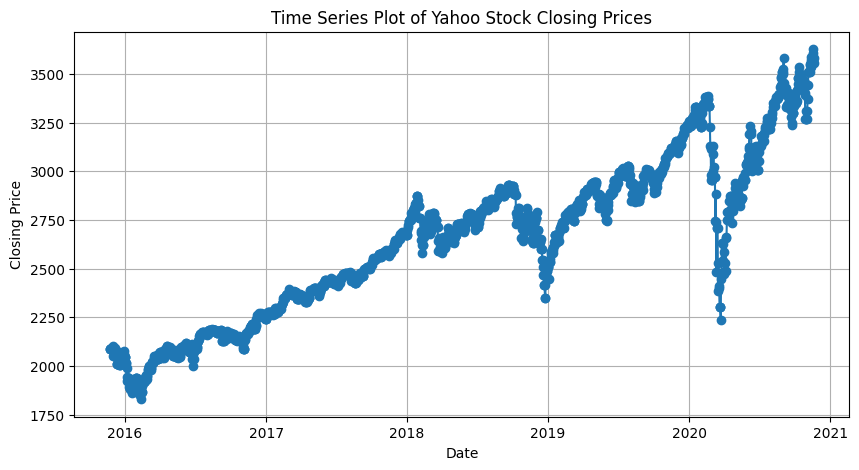

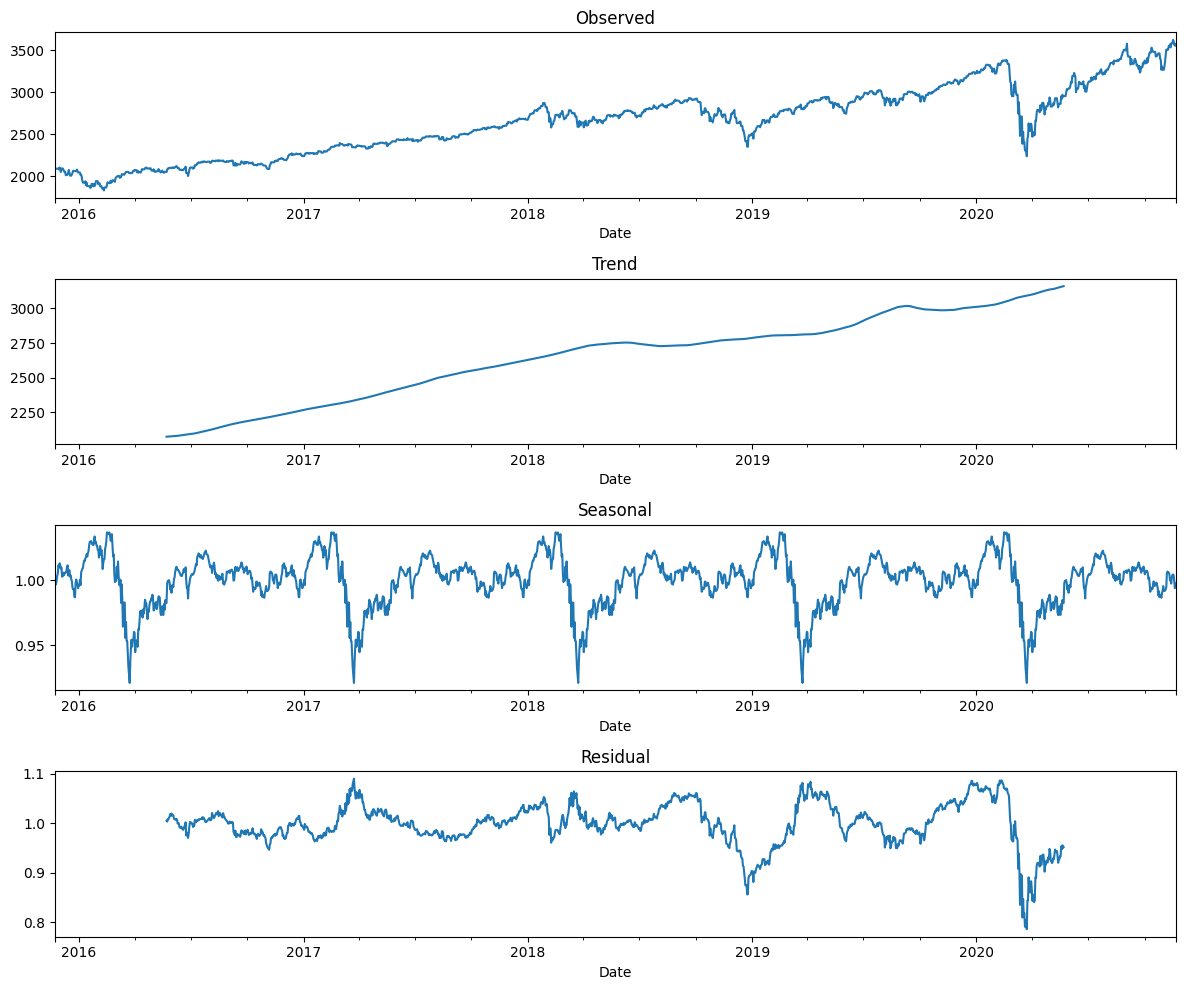

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv('/content/yahoo_stock.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(data['Close'], marker='o', linestyle='-')
plt.title('Time Series Plot of Yahoo Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()

2. Different forecasting techniques like simple exponential smoothing(SES) ,Simple moving average(SMA) , Hotwinters smoothing.Calculate the evaluation matric such as mean absolute error(MAE) , Mean squared error(MSE),root mean squared error(RMSE) for each forecasting technique. Identify the trnds and seasonal patterns for the above forecasting technique.

SMA - MAE: 34.34, MSE: 2321.78, RMSE: 48.18
SES - MAE: 27.50, MSE: 1453.43, RMSE: 38.12
HW - MAE: 13.79, MSE: 370.56, RMSE: 19.25


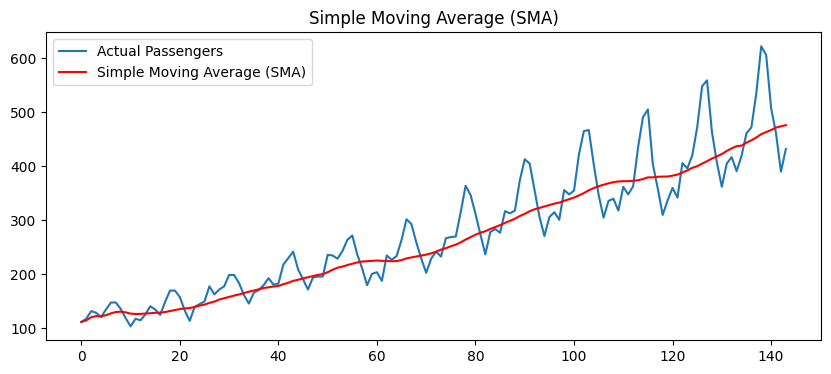

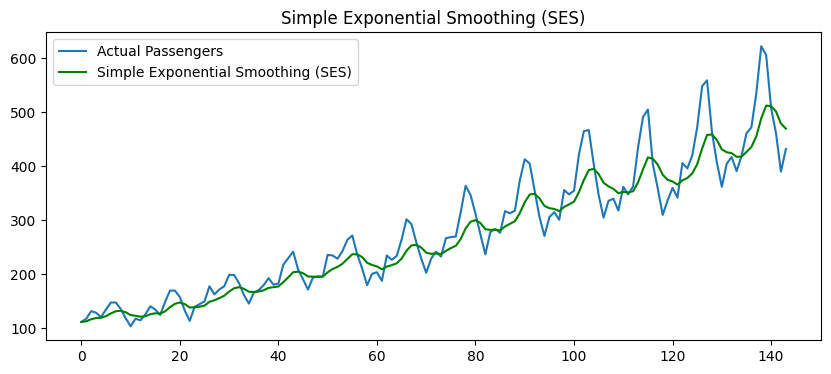

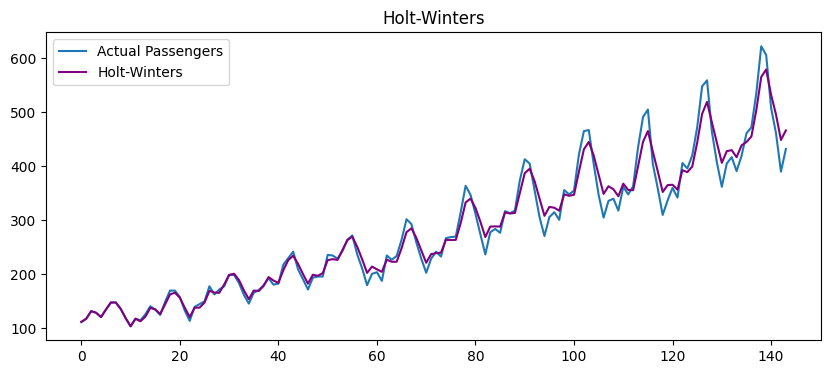

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

with open('airline-passengers.csv', 'r') as file:
    data = np.array([line.split(',') for line in file.read().splitlines()])
dates, passengers = data[:, 0], data[:, 1].astype(int)

def sma(data, window):
    return [np.mean(data[max(0, i-window+1):i+1]) for i in range(len(data))]

def ses(data, alpha):
    result = [data[0]]
    for i in range(1, len(data)):
        result.append(alpha * data[i] + (1 - alpha) * result[i-1])
    return result

def hw(data, alpha, beta, gamma, L):
    level, trend, seasonals = data[0], 0, [data[i] - data[0] for i in range(L)]
    result = [data[0]]
    for i in range(1, len(data)):
        prev_level = level
        level = alpha * (data[i] - seasonals[i % L]) + (1 - alpha) * (level + trend)
        trend = beta * (level - prev_level) + (1 - beta) * trend
        seasonals[i % L] = gamma * (data[i] - level) + (1 - gamma) * seasonals[i % L]
        result.append(level + trend + seasonals[i % L])
    return result

def mean_absolute_error(actual, forecast):
    return np.mean(np.abs(np.array(actual) - np.array(forecast)))

def mean_squared_error(actual, forecast):
    return np.mean((np.array(actual) - np.array(forecast)) ** 2)

def root_mean_squared_error(mse):
    return np.sqrt(mse)

sma_vals = sma(passengers, 12)
ses_vals = ses(passengers, 0.2)
hw_vals = hw(passengers, 0.3, 0.1, 0.1, 12)

sma_mae = mean_absolute_error(passengers[12:], sma_vals[12:])
sma_mse = mean_squared_error(passengers[12:], sma_vals[12:])
sma_rmse = root_mean_squared_error(sma_mse)

ses_mae = mean_absolute_error(passengers, ses_vals)
ses_mse = mean_squared_error(passengers, ses_vals)
ses_rmse = root_mean_squared_error(ses_mse)

hw_mae = mean_absolute_error(passengers, hw_vals)
hw_mse = mean_squared_error(passengers, hw_vals)
hw_rmse = root_mean_squared_error(hw_mse)

print(f"SMA - MAE: {sma_mae:.2f}, MSE: {sma_mse:.2f}, RMSE: {sma_rmse:.2f}")
print(f"SES - MAE: {ses_mae:.2f}, MSE: {ses_mse:.2f}, RMSE: {ses_rmse:.2f}")
print(f"HW - MAE: {hw_mae:.2f}, MSE: {hw_mse:.2f}, RMSE: {hw_rmse:.2f}")

def plot_results(data, forecast, title, color):
    plt.figure(figsize=(10, 4))
    plt.plot(data, label='Actual Passengers')
    plt.plot(forecast, label=title, color=color)
    plt.title(title)
    plt.legend()
    plt.show()

plot_results(passengers, sma_vals, 'Simple Moving Average (SMA)', 'red')
plot_results(passengers, ses_vals, 'Simple Exponential Smoothing (SES)', 'green')
plot_results(passengers, hw_vals, 'Holt-Winters', 'purple')

Program 3 i. Generate a sequence of white noise data and visualize it. ii. Compare the graphs of both White Noise and the time series data. iii. Use statistical tests such as the Augmented Dickey-Fuller Test and the Kwiatkowski–Phillips–Schmidt–Shin test to determine the presence of stationarity.

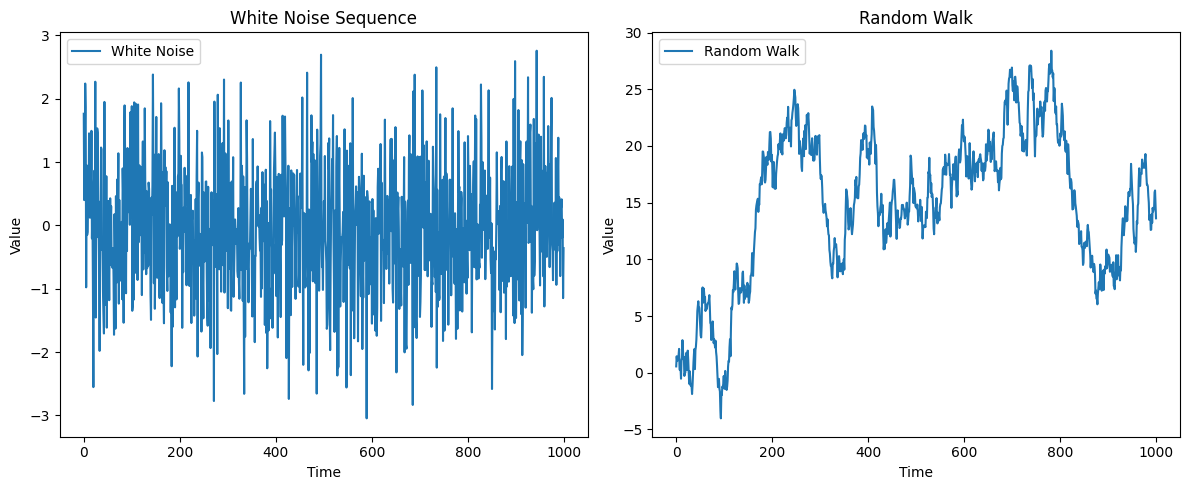

Results for White Noise:
  Augmented Dickey-Fuller Test:
    ADF Statistic: -32.462559337689974
    p-value: 0.0
    Critical Values:
      1%: -3.4369127451400474
      5%: -2.864437475834273
      10%: -2.568312754566378
  KPSS Test:
    KPSS Statistic: 0.23806270020371642
    p-value: 0.1
    Critical Values:
      10%: 0.347
      5%: 0.463
      2.5%: 0.574
      1%: 0.739


Results for Random Walk:
  Augmented Dickey-Fuller Test:
    ADF Statistic: -2.797873052694279
    p-value: 0.05857823023908081
    Critical Values:
      1%: -3.4369127451400474
      5%: -2.864437475834273
      10%: -2.568312754566378
  KPSS Test:
    KPSS Statistic: 1.2935550026767026
    p-value: 0.01
    Critical Values:
      10%: 0.347
      5%: 0.463
      2.5%: 0.574
      1%: 0.739




<ipython-input-5-ec2fae236b30>:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, nlags="auto", regression='c')
<ipython-input-5-ec2fae236b30>:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, nlags="auto", regression='c')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
def generate_white_noise(size):
    return np.random.normal(loc=0.0, scale=1.0, size=size)
def generate_random_walk(size):
    return np.cumsum(np.random.normal(loc=0.0, scale=1.0, size=size))
def visualize_data(white_noise, random_walk):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(white_noise, label='White Noise')
    plt.title('White Noise Sequence')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(random_walk, label='Random Walk')
    plt.title('Random Walk')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()
def apply_statistical_tests(series, name):
    print(f"Results for {name}:")
    adf_result = adfuller(series)
    kpss_result = kpss(series, nlags="auto", regression='c')
    print("  Augmented Dickey-Fuller Test:")
    print(f"    ADF Statistic: {adf_result[0]}")
    print(f"    p-value: {adf_result[1]}")
    print("    Critical Values:")
    for key, value in adf_result[4].items():
        print(f"      {key}: {value}")
    print("  KPSS Test:")
    print(f"    KPSS Statistic: {kpss_result[0]}")
    print(f"    p-value: {kpss_result[1]}")
    print("    Critical Values:")
    for key, value in kpss_result[3].items():
        print(f"      {key}: {value}")
    print("\n")
np.random.seed(0)
size = 1000
white_noise = generate_white_noise(size)
random_walk = generate_random_walk(size)
visualize_data(white_noise, random_walk)
apply_statistical_tests(white_noise, "White Noise")
apply_statistical_tests(random_walk, "Random Walk")